# Prepare data

In [1]:
import pandas as pd
import numpy as np

In [2]:
data='../data/'
genes=pd.read_csv(data+'Genes_selected.txt', sep="\t")
ens2gene=pd.read_csv(data+'Ensembl2gene.tsv', sep="\t")

clin2=pd.read_csv(data+'phenotype.tsv', sep="\t")
clin2=clin2.loc[clin2.neoplasm_histologic_grade.isin(['G1','G2','G3','G4'])]
clin2=clin2.rename(columns={'neoplasm_histologic_grade':'tumor_grade','tumor_stagee.diagnoses':'tumor_stage'})

fpkms=pd.read_csv(data+'TCGA-LIHC.htseq_fpkm.tsv', sep="\t")


In [3]:
fpkms.index=fpkms.Ensembl_ID.str.replace('\..+','')
fpkms=fpkms.loc[:,fpkms.columns!='Ensembl_ID']
fpkms=fpkms.loc[:,fpkms.columns.isin(clin2['submitter_id.samples'])]
clin2=clin2.loc[clin2['submitter_id.samples'].isin(fpkms.columns)]

antiox=fpkms.loc[genes.iloc[:,0]]
antiox.index=genes.iloc[:,1]
antiox.index=antiox.index.str.replace('LADH','LDHA')
antiox.index=antiox.index.str.replace('XCT','SLC7A11')
antiox.index=antiox.index.str.replace('R5PI','RPIA')

antiox.columns=antiox.columns.str.replace('.','-').str.replace('.{4}$','')



antiox=antiox.loc[:,antiox.columns.isin(clin2.submitter_id)]
clin2=clin2.loc[clin2.submitter_id.isin(antiox.columns)]

In [430]:
###R ####
# if (!requireNamespace("BiocManager", quietly = TRUE))
#   install.packages("BiocManager")
# BiocManager::install("TCGAbiolinks")
# library(TCGAbiolinks)
# tt=c("TCGA-2Y-A9GV","TCGA-CC-A8HS","TCGA-CC-5260","TCGA-UB-A7MD","TCGA-DD-AACD","TCGA-DD-AACZ","TCGA-CC-5262","TCGA-CC-A7IF","TCGA-YA-A8S7","TCGA-DD-A3A2","TCGA-5C-AAPD","TCGA-DD-AADD","TCGA-BC-A110","TCGA-BC-A10T","TCGA-DD-A1ED","TCGA-BC-A10S","TCGA-DD-AADL","TCGA-2Y-A9H3","TCGA-DD-A4NL","TCGA-WX-AA44","TCGA-MR-A8JO","TCGA-UB-A7MC","TCGA-RC-A7S9","TCGA-DD-A73C","TCGA-RC-A6M6","TCGA-UB-A7MB","TCGA-BC-A69I","TCGA-WQ-A9G7","TCGA-CC-5263","TCGA-DD-AADF","TCGA-DD-AACG","TCGA-CC-A3MB","TCGA-DD-AA3A","TCGA-CC-A7IL","TCGA-2Y-A9H0","TCGA-CC-A7IH","TCGA-RC-A7SH","TCGA-DD-AAE0","TCGA-CC-A123","TCGA-DD-A73D","TCGA-DD-A4NV","TCGA-DD-A4NO","TCGA-RC-A7SK","TCGA-DD-AADN","TCGA-DD-AADB","TCGA-DD-AAEE","TCGA-3K-AAZ8","TCGA-NI-A8LF","TCGA-DD-AAD1","TCGA-XR-A8TD")
# clinical <- GDCquery_clinic(project = "TCGA-LIHC", type = "clinical")
# clinical=clinical[clinical$submitter_id %in% tt,]
# write.table(clinical, file = "/Users/rui.benfeitas/OneDrive/GitHub/research_school/data/clinical.tsv", sep = "\t")
# ####

# clin=pd.read_csv(data+'clinical.tsv', sep="\t")
# exposure=pd.read_csv(data+'exposure.tsv', sep="\t")




antiox=fpkms.loc[genes.iloc[:,0].values,]

In [4]:

# clin=clin.loc[:,['submitter_id','gender','year_of_birth','race','vital_status','age_at_index','tumor_stage']]

# clin=pd.merge(clin,exposure.loc[:,['submitter_id','weight','cigarettes_per_day','alcohol_history','bmi','height','years_smoked']], on='submitter_id')

clin2=clin2.rename(columns={'submitter_id':'id'})
clin2=clin2.loc[:,np.append(['id'],[clin2.columns[clin2.columns!='id'].values])]
clin2=clin2.rename(columns={'tumor_stage.diagnoses':'tumor_stage','vital_status.demographic':'vital_status'})

In [5]:
clin2.to_csv(data+'samples_phenotype.tsv',sep="\t", index=False)


In [6]:


uniprot=pd.read_csv(data+'uniprot.tsv',sep="\t")
uniprot=uniprot.rename(columns={uniprot.columns[0]:'genes'})
uniprot=uniprot.loc[:,np.append(['genes'],uniprot.columns[uniprot.columns!='genes'])]
uniprot=uniprot.loc[:,['genes','Protein names','Gene ontology (biological process)','Gene ontology (cellular component)']]
uniprot.set_index('genes',inplace=True)
uniprot=uniprot.replace('( \[GO\:\d+\])|( \(EC .+\))','', regex=True)
uniprot=uniprot.reset_index().drop_duplicates(subset='genes',keep='first').set_index('genes')


In [8]:

antiox=pd.concat([uniprot, antiox],1)
antiox=antiox.rename(columns={'Protein names':'Description','Gene ontology (biological process)':'Biological_process','Gene ontology (cellular component)':'Subcellular_location'})

In [9]:
antiox=antiox.reset_index().rename(columns={'index':'Gene'})

In [11]:




antiox.to_csv(data+'liver_cancer_study.tsv', sep="\t", index=False)

# Data science with Python

Here, we will work with a [genomics](https://en.wikipedia.org/wiki/Genomics) data set from 50 liver cancer patients.

In Python, there is a module called Pandas which can be used to analyze large datasets.

## Load patient data

In [396]:
import os

In [20]:
# import the pandas module and name it "pd"
import pandas as pd

# import numpy to get a lot of math functions
import numpy as np

%matplotlib inline


# download the clinical data
# url = "https://raw.githubusercontent.com/researchschool/datalab/master/breast_cancer_study.txt"

#read the clinical data
clinical_data=pd.read_csv('../data/samples_phenotype.tsv', delimiter="\t")

`clinical_data` is an object, which means, we can call attributes like `clinical_data.shape` or call functions (methods) such as `data.head()`.

What do the numbers mean?

In [409]:
clinical_data.shape

(366, 20)

In [420]:
# check how the top lines of clinical data look
clinical_data.head()

,id,submitter_id.samples,age_at_initial_pathologic_diagnosis,tumor_grade,tumor_stage,platelet_result_count,weight,year_of_initial_pathologic_diagnosis,ethnicity.demographic,gender.demographic,race.demographic,vital_status,year_of_birth.demographic,bmi.exposures,height.exposures,weight.exposures,name.tissue_source_site,project.tissue_source_site,days_to_collection.samples,initial_weight.samples
0,TCGA-DD-AAVQ,TCGA-DD-AAVQ-01A,38.0,G2,stage i,128.0,72.0,2007.0,not hispanic or latino,male,asian,Alive,1969.0,24.622961,171.0,72.0,Mayo Clinic - Rochester,Liver hepatocellular carcinoma,2464.0,80
1,TCGA-DD-AAE3,TCGA-DD-AAE3-01A,50.0,G2,stage i,180.0,73.0,2013.0,not hispanic or latino,male,asian,Alive,1963.0,26.813590,165.0,73.0,Mayo Clinic - Rochester,Liver hepatocellular carcinoma,342.0,30
2,TCGA-PD-A5DF,TCGA-PD-A5DF-01A,58.0,G2,stage iiib,NaN,72.0,2007.0,not hispanic or latino,female,white,Dead,1949.0,25.816630,167.0,72.0,Fox Chase,Liver hepatocellular carcinoma,1906.0,140
3,TCGA-DD-AA3A,TCGA-DD-AA3A-01A,81.0,G4,stage i,256.0,60.0,2009.0,not hispanic or latino,female,white,Dead,1928.0,26.314635,151.0,60.0,Mayo Clinic - Rochester,Liver hepatocellular carcinoma,1559.0,100
4,TCGA-G3-A3CG,TCGA-G3-A3CG-01A,80.0,G2,stage i,131.0,93.0,2011.0,not hispanic or latino,male,white,Alive,1931.0,32.950680,168.0,93.0,Alberta Health Services,Liver hepatocellular carcinoma,261.0,270


Let's look at how tumor stage and vital status look. Can you count how many of the samples were from Stage I,  alive patients?

In [421]:
clinical_data.loc[:, ['tumor_grade','tumor_stage','vital_status']]

,tumor_grade,tumor_stage,vital_status
0,G2,stage i,Alive
1,G2,stage i,Alive
2,G2,stage iiib,Dead
3,G4,stage i,Dead
4,G2,stage i,Alive
5,G3,stage iiia,Dead
6,G2,stage i,Alive
7,G3,stage iiib,Alive
8,G3,stage i,Alive
9,G2,stage i,Dead


How many samples do we have? How many have tumor stage information? And how many belong to people who were alive when samples were collected?

What does the following command do?

In [422]:
clinical_stats=pd.DataFrame(clinical_data.groupby(['tumor_grade','vital_status'])['id'].count())
clinical_stats

id
tumor_grade vital_status     
G1          Alive          37
            Dead           18
G2          Alive         117
            Dead           60
G3          Alive          78
            Dead           43
            Not Reported    1
G4          Alive           7
            Dead            5

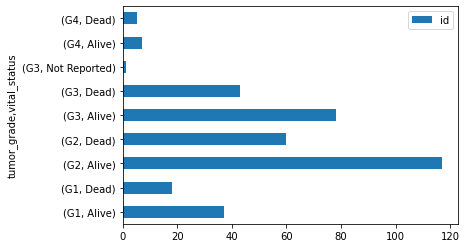

In [423]:
clinical_stats.plot.barh()

## Load a dataset

We will now start using the information above together with genomics data.

In [12]:
# download the genomics dataset
# url = "https://raw.githubusercontent.com/researchschool/datalab/master/breast_cancer_study.txt"

data = pd.read_csv('../data/liver_cancer_study.tsv', delimiter="\t")

Examine the first rows of the dataframe. What do the different columns mean? And how many rows and columns does it have? And what do the different values mean?

## Tidying up the dataset

In [13]:
# Assign gene names as the names of the rows
data.index=data['Gene']

# remove the descriptions
data_no_desc = data.drop(columns=['Description', 'Biological_process','Subcellular_location'])
data_no_desc.head()

,Gene,TCGA-DD-A4NG,TCGA-G3-AAV4,TCGA-2Y-A9H1,TCGA-BC-A10Y,TCGA-K7-AAU7,TCGA-BC-A10W,TCGA-DD-AACV,TCGA-DD-AAD3,TCGA-DD-A1EI,...,TCGA-DD-A73C,TCGA-DD-AAW1,TCGA-XR-A8TF,TCGA-CC-A5UC,TCGA-DD-A39Y,TCGA-DD-A114,TCGA-NI-A8LF,TCGA-DD-AADF,TCGA-DD-AAEI,TCGA-2Y-A9H5
Gene,,,,,,,,,,,,,,,,,,,,,
CD44,CD44,3.924143,0.937697,3.035327,1.078557,4.811782,2.855711,0.836381,1.843840,2.097177,...,1.313014,2.829117,0.507286,1.787887,2.387489,4.335200,1.344657,0.757303,1.323846,1.566834
SLC7A11,SLC7A11,0.825828,2.019061,0.276539,0.131229,2.174482,3.061058,0.083977,0.055147,0.908793,...,0.021164,0.027822,0.363838,0.683047,2.268773,0.803607,0.263856,0.086278,0.741406,0.168173
ACSS2,ACSS2,4.294168,4.019318,4.736077,4.557080,3.030791,3.732141,5.038372,3.343817,3.606806,...,4.774687,3.203448,3.279401,6.478322,3.490992,3.621908,5.206280,4.972037,4.687967,4.000064
ACSS1,ACSS1,1.283499,0.577648,1.343923,1.121311,0.791965,3.070226,0.303793,0.819981,1.065481,...,0.633630,0.193337,0.415207,1.062016,1.805049,1.980478,0.996611,1.634020,0.672813,1.890890
HMOX1,HMOX1,4.410001,4.437017,4.146421,3.374783,4.163209,6.119191,3.002955,2.623993,3.844269,...,5.720208,2.858821,3.008675,4.936400,6.667236,6.325203,3.400283,3.435217,4.827363,2.970664


In [17]:
# show the new row names
data_no_desc.index

# delete the protein column
data_values = data_no_desc.drop(columns="Gene")

data_values.head()

,TCGA-DD-A4NG,TCGA-G3-AAV4,TCGA-2Y-A9H1,TCGA-BC-A10Y,TCGA-K7-AAU7,TCGA-BC-A10W,TCGA-DD-AACV,TCGA-DD-AAD3,TCGA-DD-A1EI,TCGA-DD-AAC9,...,TCGA-DD-A73C,TCGA-DD-AAW1,TCGA-XR-A8TF,TCGA-CC-A5UC,TCGA-DD-A39Y,TCGA-DD-A114,TCGA-NI-A8LF,TCGA-DD-AADF,TCGA-DD-AAEI,TCGA-2Y-A9H5
Gene,,,,,,,,,,,,,,,,,,,,,
CD44,3.924143,0.937697,3.035327,1.078557,4.811782,2.855711,0.836381,1.843840,2.097177,2.509851,...,1.313014,2.829117,0.507286,1.787887,2.387489,4.335200,1.344657,0.757303,1.323846,1.566834
SLC7A11,0.825828,2.019061,0.276539,0.131229,2.174482,3.061058,0.083977,0.055147,0.908793,0.493451,...,0.021164,0.027822,0.363838,0.683047,2.268773,0.803607,0.263856,0.086278,0.741406,0.168173
ACSS2,4.294168,4.019318,4.736077,4.557080,3.030791,3.732141,5.038372,3.343817,3.606806,5.437401,...,4.774687,3.203448,3.279401,6.478322,3.490992,3.621908,5.206280,4.972037,4.687967,4.000064
ACSS1,1.283499,0.577648,1.343923,1.121311,0.791965,3.070226,0.303793,0.819981,1.065481,0.735576,...,0.633630,0.193337,0.415207,1.062016,1.805049,1.980478,0.996611,1.634020,0.672813,1.890890
HMOX1,4.410001,4.437017,4.146421,3.374783,4.163209,6.119191,3.002955,2.623993,3.844269,4.320303,...,5.720208,2.858821,3.008675,4.936400,6.667236,6.325203,3.400283,3.435217,4.827363,2.970664


What is the mean gene expression for each gene?

In [18]:
data_values.mean(1)

Gene
CD44       2.101243
SLC7A11    0.634561
ACSS2      4.039128
ACSS1      1.367651
HMOX1      4.163300
             ...   
CYBB       1.846371
NOX5       0.017901
SHMT1      4.617126
GLDC       3.568760
SHMT2      5.233773
Length: 166, dtype: float64

## Inspecting the data

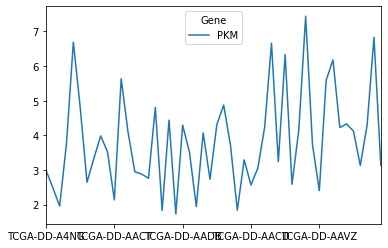

In [31]:
# show the expression profile of one gene, for 50 samples
data_values.loc[["PKM"]].T.iloc[:50].plot()

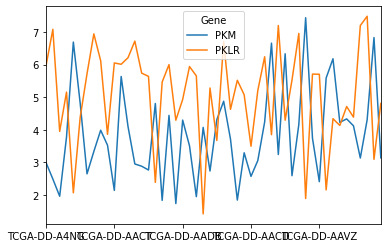

In [32]:
# show multiple proteins
data_values.loc[["PKM", "PKLR"]].T.iloc[:50].plot()

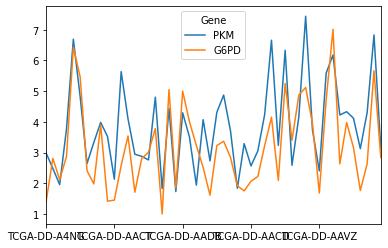

In [34]:
# Show PKM and G6PD
data_values.loc[["PKM", "G6PD"]].T.iloc[:50].plot()

Do you see any patterns when you look at the expression of PKM and PKLR? What about PKM and G6PD?  
What is your hypothesis of what is happening with these genes in terms of their expressions?

## Find co-regulated genes in liver cancer

Genes usually do not act on their own. They are often co-regulated to develop functions together, which means that their expression profile across all the tumors shows similar profiles. We can find such groups of co-regulated genes by comparing their expression profile with each other. 

In the table below, what do values $\approx1$, $\approx-1$, or $\approx0$ mean?

In [35]:
# calculate a correlation matrix
corr_matrix = data_values.T.corr()

# show the head of the correlation matrix
corr_matrix.head()

Gene,CD44,SLC7A11,ACSS2,ACSS1,HMOX1,HIF1A,NFE2L2,SQSTM1,NQO1,PFKP,...,SOD3,SOD2,DUOX1,DUOX2,SOD1,CYBB,NOX5,SHMT1,GLDC,SHMT2
Gene,,,,,,,,,,,,,,,,,,,,,
CD44,1.000000,0.315535,-0.182158,0.251430,0.479448,0.485103,0.194125,0.208414,0.205814,0.503170,...,0.325869,0.444741,0.117244,0.235125,-0.104669,0.601382,0.114677,-0.130976,-0.210054,0.062566
SLC7A11,0.315535,1.000000,-0.111946,0.009233,0.225107,0.251405,0.265105,0.438700,0.305308,0.292289,...,0.026194,0.140912,0.045169,0.135416,-0.052675,0.254900,0.037813,-0.234219,-0.322165,0.167225
ACSS2,-0.182158,-0.111946,1.000000,-0.014375,-0.035872,-0.259714,-0.037445,0.022768,-0.073973,-0.309945,...,-0.136633,-0.055058,-0.139763,-0.165449,0.211505,-0.165936,-0.103561,0.330007,0.146469,0.055558
ACSS1,0.251430,0.009233,-0.014375,1.000000,0.225347,0.346575,-0.118470,-0.074890,0.093555,0.415991,...,0.394823,0.135008,0.297905,0.229943,-0.370328,0.379157,0.090738,-0.325320,0.074193,-0.086966
HMOX1,0.479448,0.225107,-0.035872,0.225347,1.000000,0.265065,0.032085,0.216763,0.166963,0.276020,...,0.175585,0.339561,0.004702,0.088412,-0.162749,0.540194,0.028067,-0.150079,-0.014187,0.174850


Let's examine the correlations for PKM, PKLR, G6PD and PRDX1

In [36]:
corr_matrix.loc[['PKM','PKLR','G6PD','PRDX1'],['PKM','PKLR','G6PD','PRDX1']]

Gene,PKM,PKLR,G6PD,PRDX1
Gene,,,,
PKM,1.000000,-0.534616,0.667504,0.152539
PKLR,-0.534616,1.000000,-0.281347,-0.096287
G6PD,0.667504,-0.281347,1.000000,0.519483
PRDX1,0.152539,-0.096287,0.519483,1.000000


Look again at the expression of PKM + G6PD, PKM + PKLR, and PKM + PRDX1. Can you explain the correlations above? What is a good and a bad correlation?

In [116]:
#data_log.loc[["PKM", "G6PD"]].T.iloc[1:].plot()

### Visualise the correlation matrix

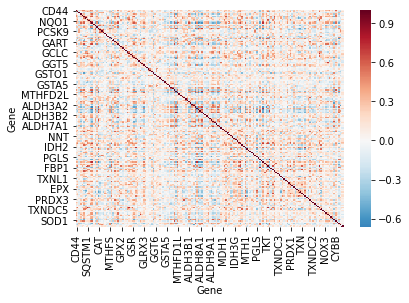

In [37]:
import seaborn as sns

sns.heatmap(corr_matrix, cmap="RdBu_r", center=0)

We cannot really see what is going on... Let's structure the data with some machine learning.

### Data clustering

When you cluster the correlation matrix above, do you see anything particular in the new heatmap?

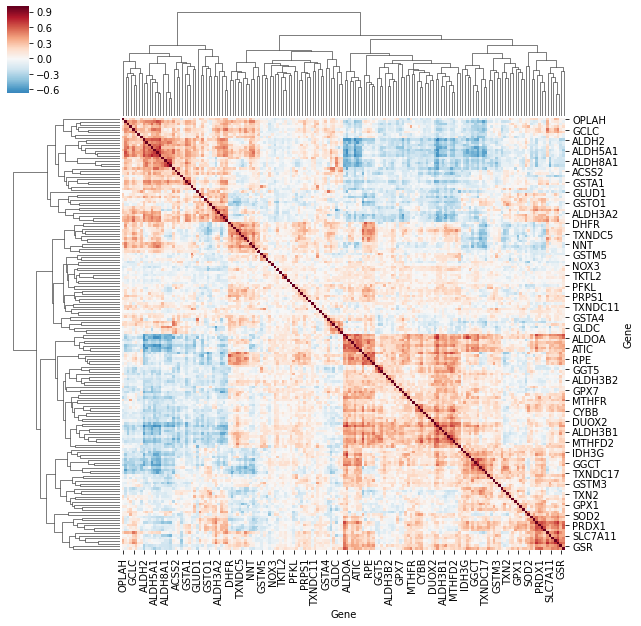

In [38]:
sns.clustermap(corr_matrix, cmap="RdBu_r", center=0)

Let's focus on a few genes in addition to those we've looked above

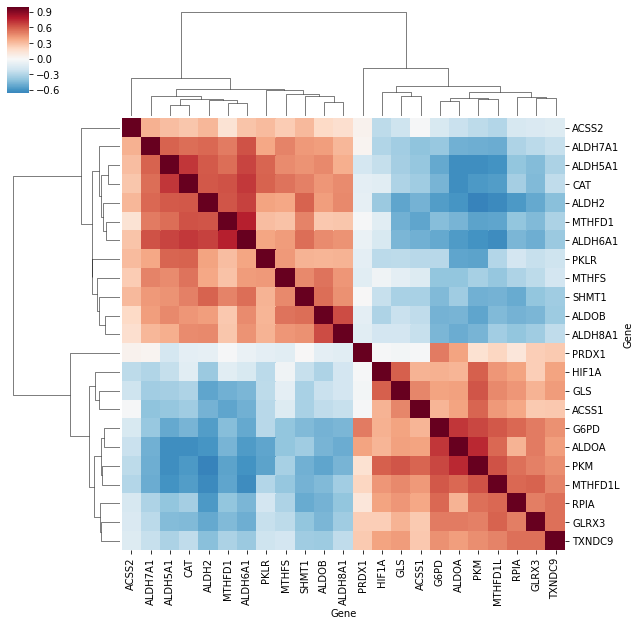

In [39]:
genes_of_interest=[
    'PKM','PKLR','G6PD','PRDX1','ALDOA','MTHFD1L','GLRX3','RPIA','GLS','TXNDC9',
    'HIF1A','MTHFS','ALDOB','SHMT1','ALDH8A1','ALDH7A1','MTHFD1','ALDH5A1','CAT',
    'ALDH6A1','ALDH2','ACSS1','ACSS2']

sns.clustermap(
    corr_matrix.loc[genes_of_interest,genes_of_interest], 
    cmap="RdBu_r", center=0
)

## Compare expression through cancer progression 
Liver cancer comes in different subgroups, which may depend on the tumor progression. Let's see how the genes above are expressed at different tumor stages by comparing early (Grade 1) with advanced (Grades III + IV) cancers

In [44]:
#read the clinical data if you haven't done so already
clinical_data=pd.read_csv('../data/samples_phenotype.tsv', delimiter="\t")

#use only columns 'id' and 'tumor_stage'
clinical_data=clinical_data.loc[:,['id','tumor_grade']]

# drop rows with no tumor stage information
clinical_data=clinical_data.loc[clinical_data.tumor_grade!='not reported']

clinical_data.head()

,id,tumor_grade
0,TCGA-DD-AAVQ,G2
1,TCGA-DD-AAE3,G2
2,TCGA-PD-A5DF,G2
3,TCGA-DD-AA3A,G4
4,TCGA-G3-A3CG,G2


We will compare samples from early cancer (G1) vs advanced cancer (G3+G4).

In [97]:
# Gets the ids from samples from early / advanced cancer
early_cancer=clinical_data.loc[clinical_data.tumor_grade=='G1', 'id'].values
adv_cancer=clinical_data.loc[clinical_data.tumor_grade.isin(['G3','G4', 'id'])].values

# Samples belonging to either early or advanced cancer
ear_adv_samples=data_values.loc[:,data_values.columns.isin(np.append(early_cancer, adv_cancer))]

# Look at the genes of interest above
ear_adv_samples=ear_adv_samples.loc[genes_of_interest]

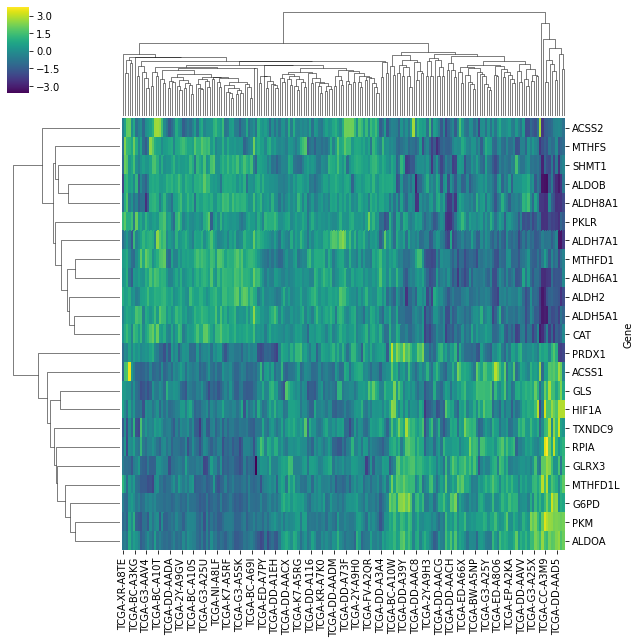

In [99]:
sns.clustermap(ear_adv_samples, cmap="viridis", z_score=0)

Let's look at the expression of PKM, PKLR, G6PD, and ALDH2 in different tumor groups

In [103]:
#select genes and samples
data_ear_adv_genes=ear_adv_samples.copy().loc[['PKM','G6PD','PKLR','ALDH2']]

#rename samples to "early" and "adv" to make it easier to understand
data_ear_adv_genes.columns=np.append(np.repeat('early',len(early_cancer)),np.repeat('adv',len(adv_cancer)))

data_ear_adv_genes=data_ear_adv_genes.stack().reset_index().rename(columns={'level_1':'progression',0:'expression'})

data_ear_adv_genes.head()

,Gene,progression,expression
0,PKM,early,2.485179
1,PKM,early,3.774239
2,PKM,early,4.814463
3,PKM,early,2.644124
4,PKM,early,2.946841


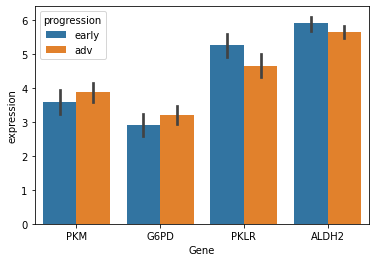

In [105]:
# Look at the expression of the different genes with respect to the tumor progression
sns.barplot(
    data=data_ear_adv_genes,
    x='Gene', y='expression', hue='progression'       
           )

What can you say about the expression of PKM, G6PD, PKLR and ALDH2 in early and advanced tumors?  
What about their co-expression patterns?  
Does this accept support your hypothesis, or do you need to modify it?